### run tflite model

In [1]:
import numpy as np
import tflite_runtime.interpreter as tflite

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
interpreter = tflite.Interpreter(model_path='./mediapipe/mediapipe/models/iris_landmark.tflite')
interpreter.allocate_tensors()

In [3]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [4]:
# Test model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

In [5]:
# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data  = interpreter.get_tensor(output_details[0]['index'])
output_score  = interpreter.get_tensor(output_details[1]['index'])
print(output_data, output_score)

[[21.909721   32.969776    4.7278996  23.649357   33.980408    3.3298676
  25.507898   34.464184    2.0946882  27.948002   34.977734    0.73552155
  31.24988    35.136616   -0.6274537  34.22344    34.86361    -1.2586683
  36.74186    34.14087    -1.2012439  38.54272    33.545437   -0.6881331
  39.345016   33.040783   -0.7642733  23.141647   32.440857    3.0916169
  24.529057   31.859947    1.6981865  26.823042   31.02741     0.47429597
  30.265224   30.464115   -0.78392315 33.48884    30.662697   -1.4765882
  36.52132    31.331738   -1.3512982  38.51961    32.31887    -1.0235138
  20.518238   33.072784    5.312389   22.212337   35.64824     3.8513026
  24.58007    36.977737    2.129624   28.065544   37.826515    0.19605249
  31.55059    37.57008    -1.2110426  34.961388   36.96912    -2.086228
  37.726646   35.817337   -2.1199296  39.570976   34.575363   -1.8047974
  40.543976   32.960983   -1.5567045  20.370312   30.838198    3.3834503
  22.134844   29.230848    1.3219572  24.674574  

In [6]:
%%timeit
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

24 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
import torch

In [8]:
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())

PyTorch version: 1.4.0
CUDA version: 10.0
cuDNN version: 7603


In [9]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
from blazeiris import Blazeiris

net = Blazeiris().to(device)
net.load_weights("blazeiris.pth")

In [10]:
input_t = torch.from_numpy(input_data).permute((0, 3, 1, 2)).to(device)

In [11]:
with torch.no_grad():
    out = net(input_t)

In [12]:
print(output_data, output_score)
print(input_data.shape)

[[21.909721   32.969776    4.7278996  23.649357   33.980408    3.3298676
  25.507898   34.464184    2.0946882  27.948002   34.977734    0.73552155
  31.24988    35.136616   -0.6274537  34.22344    34.86361    -1.2586683
  36.74186    34.14087    -1.2012439  38.54272    33.545437   -0.6881331
  39.345016   33.040783   -0.7642733  23.141647   32.440857    3.0916169
  24.529057   31.859947    1.6981865  26.823042   31.02741     0.47429597
  30.265224   30.464115   -0.78392315 33.48884    30.662697   -1.4765882
  36.52132    31.331738   -1.3512982  38.51961    32.31887    -1.0235138
  20.518238   33.072784    5.312389   22.212337   35.64824     3.8513026
  24.58007    36.977737    2.129624   28.065544   37.826515    0.19605249
  31.55059    37.57008    -1.2110426  34.961388   36.96912    -2.086228
  37.726646   35.817337   -2.1199296  39.570976   34.575363   -1.8047974
  40.543976   32.960983   -1.5567045  20.370312   30.838198    3.3834503
  22.134844   29.230848    1.3219572  24.674574  

In [13]:
out

[tensor([[21.9097, 32.9698,  4.7279, 23.6493, 33.9804,  3.3299, 25.5079, 34.4642,
           2.0947, 27.9480, 34.9777,  0.7355, 31.2499, 35.1366, -0.6275, 34.2234,
          34.8636, -1.2587, 36.7418, 34.1408, -1.2012, 38.5427, 33.5455, -0.6881,
          39.3450, 33.0408, -0.7643, 23.1416, 32.4409,  3.0916, 24.5291, 31.8600,
           1.6982, 26.8230, 31.0274,  0.4743, 30.2652, 30.4641, -0.7839, 33.4888,
          30.6627, -1.4766, 36.5213, 31.3317, -1.3513, 38.5196, 32.3189, -1.0235,
          20.5182, 33.0728,  5.3124, 22.2123, 35.6482,  3.8513, 24.5801, 36.9777,
           2.1296, 28.0655, 37.8265,  0.1961, 31.5506, 37.5701, -1.2110, 34.9614,
          36.9691, -2.0862, 37.7266, 35.8173, -2.1199, 39.5710, 34.5754, -1.8048,
          40.5440, 32.9610, -1.5567, 20.3703, 30.8382,  3.3835, 22.1348, 29.2309,
           1.3220, 24.6746, 27.5534, -0.2542, 28.6177, 26.7226, -1.8223, 32.7375,
          26.9678, -2.4688, 36.3402, 28.2244, -2.2250, 39.5848, 30.7649, -1.8783,
          19.045

In [14]:
import cv2
img = cv2.imread("eyesample2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_ori = cv2.resize(img, (64,64))

In [15]:
img_ori = img_ori[np.newaxis, ...]
input_data = img_ori.astype('float32')
input_data = input_data / 127.5 - 1.0
input_data.shape

(1, 64, 64, 3)

In [16]:
input_data.min()

-0.96862745

In [17]:
interpreter = tflite.Interpreter(model_path='./mediapipe/mediapipe/models/iris_landmark.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
output_score = interpreter.get_tensor(output_details[1]['index'])
print(output_data, output_score)

[[ 20.199902    36.47366      5.242034    22.561987    38.73013
    3.6028562   25.132092    40.149277     2.2678447   28.715712
   41.090824     0.6922799   33.69872     41.16095     -0.36431423
   38.48287     40.33644     -0.3428996   43.047825    39.184006
    0.5900787   46.11066     38.70252      1.6962507   47.45645
   38.201767     1.7142663   21.412014    35.236538     2.6694076
   23.034483    33.794716     0.6145719   25.958042    31.94916
   -1.2692604   30.855669    30.696815    -2.5492582   35.99106
   30.924528    -2.4692311   41.364822    33.062138    -1.2275732
   45.52043     36.180912     0.43962747  17.972286    36.34012
    6.3076425   20.887411    40.513275     4.75683     23.93947
   43.16878      2.7714238   28.854635    44.242043     0.6711279
   34.18095     44.295475    -0.54226583  39.74244     43.43052
   -0.6440459   44.445457    41.803673     0.31874764  47.596535
   40.27668      0.9315882   49.421833    38.306183     1.2309594
   17.321266    31.722366 

In [18]:
input_t = torch.from_numpy(input_data).permute((0, 3, 1, 2)).to(device)
with torch.no_grad():
    out = net(input_t)

In [19]:
print(out)

[tensor([[ 20.1999,  36.4737,   5.2420,  22.5620,  38.7301,   3.6029,  25.1321,
          40.1493,   2.2678,  28.7157,  41.0908,   0.6923,  33.6987,  41.1609,
          -0.3643,  38.4829,  40.3364,  -0.3429,  43.0478,  39.1840,   0.5901,
          46.1106,  38.7025,   1.6963,  47.4565,  38.2018,   1.7143,  21.4120,
          35.2365,   2.6694,  23.0345,  33.7947,   0.6146,  25.9581,  31.9492,
          -1.2693,  30.8557,  30.6968,  -2.5493,  35.9911,  30.9245,  -2.4692,
          41.3648,  33.0621,  -1.2276,  45.5204,  36.1809,   0.4396,  17.9723,
          36.3401,   6.3076,  20.8874,  40.5133,   4.7568,  23.9395,  43.1688,
           2.7714,  28.8547,  44.2420,   0.6711,  34.1810,  44.2955,  -0.5423,
          39.7424,  43.4305,  -0.6440,  44.4455,  41.8037,   0.3187,  47.5965,
          40.2767,   0.9316,  49.4218,  38.3062,   1.2310,  17.3213,  31.7224,
           2.5272,  19.4161,  28.3888,  -0.8958,  23.3026,  25.5537,  -3.1887,
          29.5044,  24.2298,  -4.9123,  36.3920,  2

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

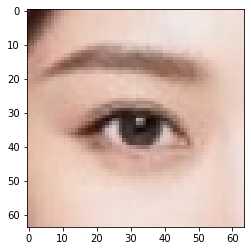

In [21]:
plt.imshow(img_ori.squeeze())

In [22]:
hand_kpts = output_data.reshape(-1, 3)
iris = output_score.reshape(-1,3)

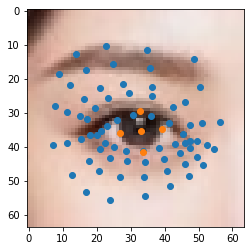

In [23]:
fig, ax = plt.subplots()
ax.imshow(img_ori.squeeze())
ax.scatter(hand_kpts[:, 0], hand_kpts[:, 1])
ax.scatter(iris[:, 0], iris[:, 1])

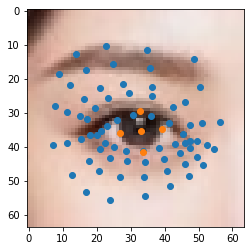

In [24]:
detections1, detections2 = out
detections1 = detections1.reshape(-1,3)
detections2 = detections2.reshape(-1,3)
fig, ax = plt.subplots()
ax.imshow(img_ori.squeeze())
ax.scatter(detections1[:, 0], detections1[:, 1])
ax.scatter(detections2[:, 0], detections2[:, 1])